In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决符号无法显示

In [2]:
#导入数据
data = pd.read_excel("8-8 表8.3.xlsx")
data.head()
print("输出数据矩阵为：\n",data)

输出数据矩阵为：
     力学（闭）X1  物理（闭）X2  代数（开）X3  分析（开）X4  统计（开）X5
0        77       82       67       67       81
1        75       73       71       66       81
2        63       63       65       70       63
3        51       67       65       65       68
4        62       60       58       62       70
5        52       64       60       63       54
6        50       50       64       55       63
7        31       55       60       57       73
8        44       69       53       53       53
9        62       46       61       57       45
10       44       61       52       62       46
11       12       58       61       63       67
12       54       49       56       47       53
13       44       56       55       61       36
14       46       52       65       50       35
15       30       69       50       52       45
16       40       27       54       61       61
17       36       59       51       45       51
18       46       56       57       49       32
19       42       60       54 

In [4]:
#计算协方差阵
covX = np.cov(data.T)   #计算协方差矩阵
covX

array([[191.41014799,  94.9756871 ,  46.80549683,  33.75475687,
          3.58245243],
       [ 94.9756871 , 191.77748414,  46.28964059,  31.1205074 ,
        -19.42864693],
       [ 46.80549683,  46.28964059,  52.27061311,  27.6384778 ,
         49.31501057],
       [ 33.75475687,  31.1205074 ,  27.6384778 ,  48.70190275,
         43.50739958],
       [  3.58245243, -19.42864693,  49.31501057,  43.50739958,
        282.89376321]])

In [5]:
#求解协方差矩阵的特征值和特征向量
featValue, featVec = np.linalg.eig(covX)
print("输出协方差阵的特征值为：\n",featValue)
print("输出协方差阵的特征向量为：\n",featVec)

输出协方差阵的特征值为：
 [319.49497353 295.90884632  95.4806318   35.07997906  21.08948049]
输出协方差阵的特征向量为：
 [[-0.58278856 -0.33064672  0.71966497 -0.16818522 -0.0694716 ]
 [-0.53106444 -0.42892779 -0.68875988 -0.2200476  -0.1057374 ]
 [-0.30676065  0.03058726 -0.05116497  0.43510988  0.8444074 ]
 [-0.24136181  0.05184593 -0.02946329  0.82079064 -0.51428699]
 [-0.47536347  0.83849277 -0.06485547 -0.24550945 -0.08048809]]


In [8]:
#求相关系数矩阵
corrX = np.around(np.corrcoef(data.T), decimals=3)
print("输出相关系数矩阵：\n", corrX)

输出相关系数矩阵：
 [[ 1.     0.496  0.468  0.35   0.015]
 [ 0.496  1.     0.462  0.322 -0.083]
 [ 0.468  0.462  1.     0.548  0.406]
 [ 0.35   0.322  0.548  1.     0.371]
 [ 0.015 -0.083  0.406  0.371  1.   ]]


In [9]:
featValue1, featVec1 = np.linalg.eig(corrX)
print("输出相关阵的特征值为：\n",featValue1)
print("输出相关阵的特征向量为：\n",featVec1)

输出相关阵的特征值为：
 [2.42661046 1.23436951 0.33365935 0.51524964 0.49011104]
输出相关阵的特征向量为：
 [[-0.45256599 -0.37689518 -0.16902949 -0.69122489 -0.38310734]
 [-0.4303283  -0.48645986 -0.42464106  0.36618815  0.51357625]
 [-0.55014892  0.12600973  0.75078205 -0.07741427  0.33435171]
 [-0.48792905  0.23674506 -0.06004633  0.55369918 -0.62903789]
 [-0.26317862  0.74120183 -0.4731065  -0.27484294  0.28633627]]


In [10]:
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
Load_Matrix = FactorAnalyzer(rotation=None, n_factors=len(data.T), method='principal')
Load_Matrix.fit(data)
f_contribution_var = Load_Matrix.get_factor_variance()
matrices_var = pd.DataFrame()
matrices_var["旋转前特征值"] = f_contribution_var[0]
matrices_var["旋转前方差贡献率"] = f_contribution_var[1]
matrices_var["旋转前方差累计贡献率"] = f_contribution_var[2]
print("输出旋转前的因子特征值，方差贡献率以及方差累计贡献率为：\n",matrices_var)

输出旋转前的因子特征值，方差贡献率以及方差累计贡献率为：
      旋转前特征值  旋转前方差贡献率  旋转前方差累计贡献率
0  2.426125  0.485225    0.485225
1  1.234158  0.246832    0.732057
2  0.516011  0.103202    0.835259
3  0.490072  0.098014    0.933273
4  0.333634  0.066727    1.000000


In [11]:
#旋转前的因子载荷矩阵
print("旋转前的因子载荷矩阵为：\n",Load_Matrix.loadings_)

#因子数量选择
eigenvalues = 1
N = 0
for c in matrices_var["旋转前特征值"]:
    if c >= eigenvalues:
        N += 1
    else:
        s = matrices_var["旋转前方差累计贡献率"][N-1]
        print("\n选择了" + str(N) + "个因子累计贡献率为" + str(s)+"\n")
        break

旋转前的因子载荷矩阵为：
 [[ 0.70495306 -0.41800921  0.49649772 -0.26916017  0.09670732]
 [ 0.67048761 -0.54053903 -0.26183996  0.35928625  0.24620549]
 [ 0.85701284  0.13970123  0.05494438  0.23474163 -0.43346285]
 [ 0.75985223  0.2632127  -0.39833971 -0.43984501  0.03472037]
 [ 0.40959321  0.82367841  0.19810908  0.19992744  0.27307342]]

选择了2个因子累计贡献率为0.7320566201305956




相关矩阵特征值： [2.42612547 1.23415763 0.51601077 0.49007205 0.33363408]


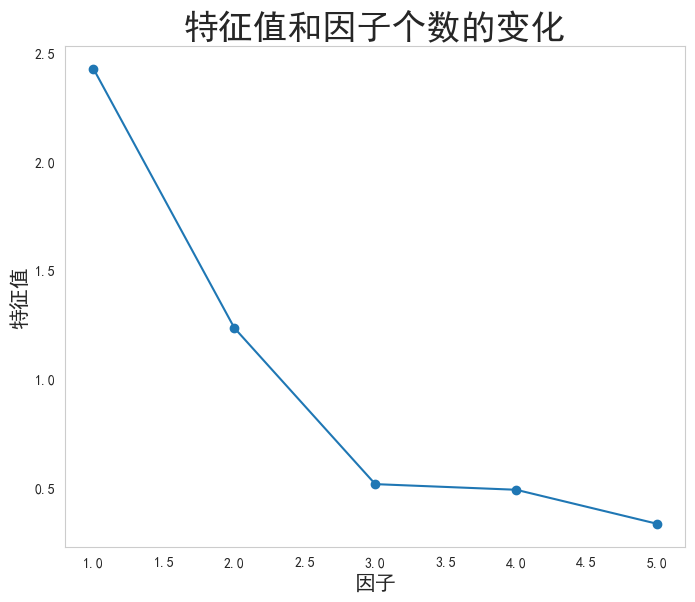

In [12]:
#因子数量的选取
# 主要用来看取多少因子合适，一般是取到平滑处左右，当然还要需要结合贡献率
import matplotlib
matplotlib.rcParams["font.family"] = "SimHei"
ev, v = Load_Matrix.get_eigenvalues()
print('\n相关矩阵特征值：', ev)
plt.figure(figsize=(8, 6.5))
plt.scatter(range(1, data.shape[1] + 1), ev)
plt.plot(range(1, data.shape[1] + 1), ev)
plt.title('特征值和因子个数的变化', fontdict={'weight': 'normal', 'size': 25})
plt.xlabel('因子', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('特征值', fontdict={'weight': 'normal', 'size': 15})
plt.grid()
plt.show()

In [13]:
#进行因子旋转后的因子载荷矩阵
Load_Matrix_rotated = FactorAnalyzer(rotation='varimax', n_factors=2, method='principal')
Load_Matrix_rotated.fit(data)
f_contribution_var_rotated = Load_Matrix_rotated.get_factor_variance()
matrices_var_rotated = pd.DataFrame()
matrices_var_rotated["特征值"] = f_contribution_var_rotated[0]
matrices_var_rotated["方差贡献率"] = f_contribution_var_rotated[1]
matrices_var_rotated["方差累计贡献率"] = f_contribution_var_rotated[2]
print("旋转后的载荷矩阵的贡献率")
print(matrices_var_rotated)
print("旋转后的成分矩阵")
print(Load_Matrix_rotated.loadings_)

旋转后的载荷矩阵的贡献率
        特征值     方差贡献率   方差累计贡献率
0  1.945910  0.389182  0.389182
1  1.714373  0.342875  0.732057
旋转后的成分矩阵
[[ 0.81006494  0.12443997]
 [ 0.86120496  0.00788044]
 [ 0.57357438  0.65192014]
 [ 0.42009885  0.68569184]
 [-0.20630131  0.89646667]]


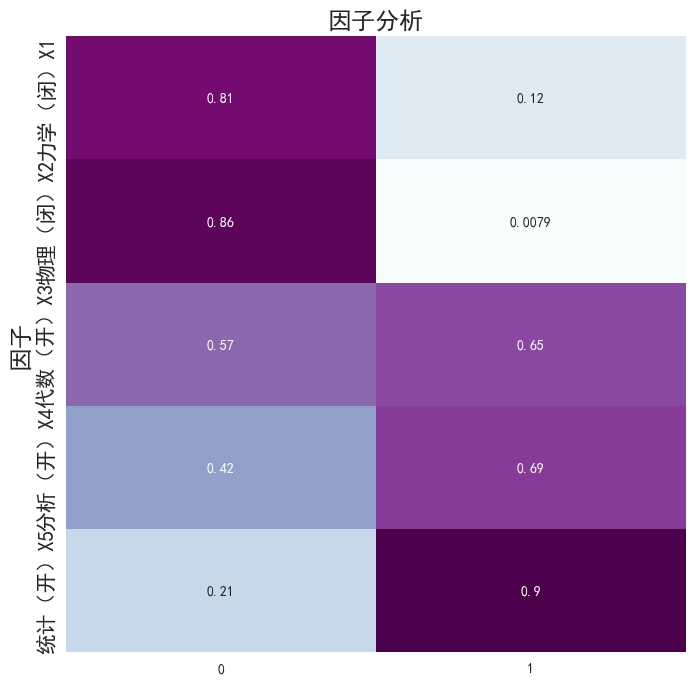

In [14]:
#对结果进行可视化，绘制相关系数图
import seaborn as sns
import numpy as np

Load_Matrix = Load_Matrix_rotated.loadings_
df = pd.DataFrame(np.abs(Load_Matrix), index=data.columns)

plt.figure(figsize=(8, 8))
ax = sns.heatmap(df, annot=True, cmap="BuPu", cbar=False)
ax.yaxis.set_tick_params(labelsize=15)  # 设置y轴字体大小
plt.title("因子分析", fontsize="xx-large")
plt.ylabel("因子", fontsize="xx-large")  # 设置y轴标签
plt.show()  # 显示图片

In [15]:
#计算因子得分
# 计算因子得分（回归方法）（系数矩阵的逆乘以因子载荷矩阵）
f_corr = data.corr()# 皮尔逊相关系数
X1 = np.mat(f_corr)
X1 = np.linalg.inv(X1)
factor_score_weight = np.dot(X1, Load_Matrix_rotated.loadings_)
factor_score_weight = pd.DataFrame(factor_score_weight)
col = []
for i in range(N):
    col.append("factor" + str(i + 1))
factor_score_weight.columns = col
factor_score_weight.index = f_corr.columns
print("因子得分：\n", factor_score_weight)

因子得分：
           factor1   factor2
力学（闭）X1  0.439514 -0.077296
物理（闭）X2  0.491553 -0.163032
代数（开）X3  0.201116  0.311683
分析（开）X4  0.106648  0.363598
统计（开）X5 -0.293158  0.622884
